# Построение графиков и визуализация

Для Python имеется много дополнительных библиотек статической и динамической визуализации, но я буду использовать в основном [matplotlib](http://matplotlib.sourceforge.net) и надстроенные над ней библиотеки.
Matplotlib – это пакет для построения графиков (главным образом двумерных), поддерживающий разнообразные графические интерфейсы пользователя во всех операционных системах, а также умеет экспортировать графические данные во всех векторных и растровых форматах: PDF, SVG, JPG, PNG, BMP, GIF и т. д.

При работе с matplotlib мы будем использовать следующее соглашение об импорте:

In [2]:
import matplotlib.pyplot as plt

После выполнения команды %matplotlib notebook в Jupyter (или просто %matplotlib в IPython) уже можно создать простой график.

In [35]:
%matplotlib notebook

In [36]:
data = [0,1,4,9,16,25]
plt.plot(data)

<IPython.core.display.Javascript object>

Графики в matplotlib «живут» внутри объекта рисунка Figure. Создать новый рисунок можно методом plt.figure:

In [37]:
fig = plt.figure()

<IPython.core.display.Javascript object>

Нельзя создать график, имея пустой рисунок. Сначала нужно создать один или несколько подграфиков с помощью метода add_subplot:

In [38]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
fig

<IPython.core.display.Javascript object>

Это означает, что рисунок будет расчерчен сеткой 2×2, и мы выбираем первый из четырех подграфиков (нумерация начинается с 1).

In [39]:
import numpy as np
plt.plot(np.random.randn(50).cumsum(), '--r')
fig

<IPython.core.display.Javascript object>

Параметр стиля '––r' говорит matplotlib, что график нужно рисовать красной штриховой линией

При выполнении команды построения графика matplotlib рисует на последнем использованном рисунке и подграфике

In [40]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
fig

<IPython.core.display.Javascript object>

Главная функция matplotlib – plot – принимает массивы координат x и y, а также необязательную строку, в которой закодированы цвет и стиль линии. Например, чтобы нарисовать график зависимости y от x зеленой штриховой линией, нужно выполнить следующий вызов:

In [41]:
x = list(range(-9,10))
y = [ i ** 3 for i in x]
ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(x, y, linestyle='-', color='g')

По умолчанию на линейных графиках соседние точки соединяются отрезками прямой, т. е. производится линейная интерполяция. Параметр drawstyle позволяет изменить этот режим:

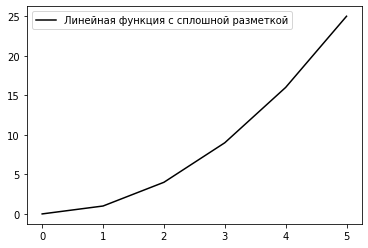

In [38]:
data = [0,1,4,9,16,25]
plt.plot(data, '-k', drawstyle='default', label='Линейная функция с сплошной разметкой')
plt.legend(loc='best')

Для создания надписи необходимо вызвать метод plt.legend (или ax.legend, если вы сохранили ссылки на оси) вне зависимости от того, передавали вы аргумент label при построении графика или нет.

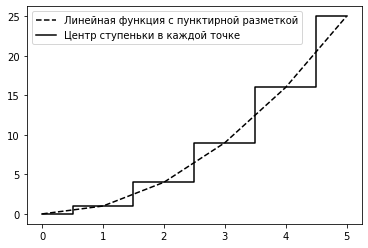

In [39]:
plt.plot(data, '--k', label='Линейная функция с пунктирной разметкой')
plt.plot(data, '-k', drawstyle='steps-mid', label='Центр ступеньки в каждой точке')
plt.legend(loc='best')

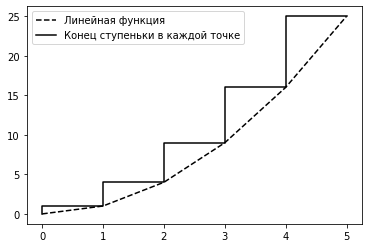

In [40]:
plt.plot(data, '--k', label='Линейная функция')
plt.plot(data, '-k', drawstyle='steps-pre', label='Конец ступеньки в каждой точке')
plt.legend(loc='best')

(-0.25, 5.25)


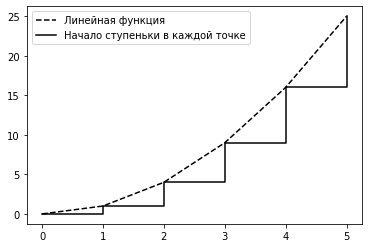

In [47]:
plt.plot(data, '--k', label='Линейная функция')
plt.plot(data, '-k', drawstyle='steps-post', label='Начало ступеньки в каждой точке')
plt.legend(loc='best')

### Риски, метки и надписи
Интерфейс pyplot, предназначенный для интерактивного использования, состоит из методов xlim, xticks и xticklabels. Они управляют размером области, занятой графиком, положением и метками рисок соответственно. Использовать их можно двумя способами:
* при вызове без аргументов возвращается текущее значение параметра. Например, метод plt.xlim() возвращает текущий диапазон значений по оси X;
* при вызове с аргументами устанавливается новое значение параметра. Например, в результате вызова plt.xlim([0, 10]) диапазон значений по оси X устанавливается от 0 до 10.

(-0.25, 5.25)


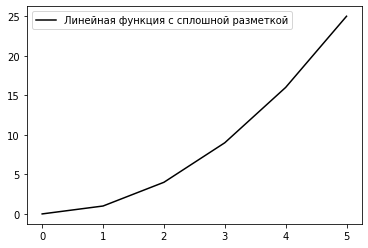

In [48]:
data = [0,1,4,9,16,25]
plt.plot(data, '-k', drawstyle='default', label='Линейная функция с сплошной разметкой')
print(plt.xlim())
plt.legend(loc='best')

(0.0, 10.0)


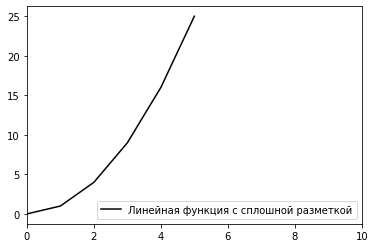

In [49]:
data = [0,1,4,9,16,25]
plt.plot(data, '-k', drawstyle='default', label='Линейная функция с сплошной разметкой')
plt.xlim([0, 10])
print(plt.xlim())
plt.legend(loc='best')

### Задание названия графика, названий осей, рисок и их меток
Чтобы проиллюстрировать оформление осей, я создам простой рисунок и в нем график случайного блуждания:

Text(0.5, 1.0, 'My first matplotlib plot')

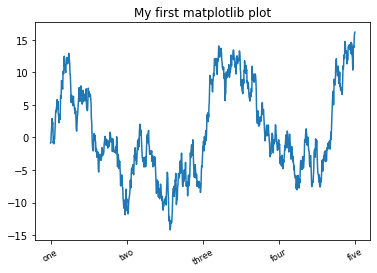

In [60]:
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

Для изменения рисок на оси X проще всего воспользоваться методами set_xticks и set_xticklabels. Первый говорит matplotlib, где в пределах диапазона значений данных ставить риски; по умолчанию их числовые значения изображаются также и в виде меток. Но можно задать и другие метки с помощью метода set_xticklabels:

Text(0.5, 1.0, 'My first matplotlib plot')

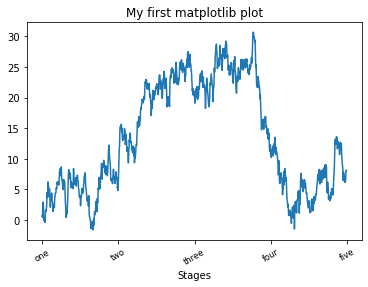

In [62]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_xlabel('Stages')
ax.set_title('My first matplotlib plot')

### Сохранение графиков в файле
Активный рисунок можно сохранить в файле методом plt.savefig. Этот метод эквивалентен методу экземпляра рисунка savefig. Например, чтобы сохранить рисунок в формате .png, достаточно указать только имя файла:

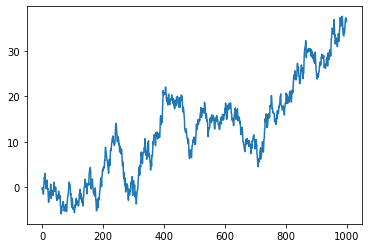

In [66]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
plt.savefig('figpath.png')

Формат выводится из расширения имени файла. Если бы мы задали файл с расширением .pdf, то рисунок был бы сохранен в формате PDF.